In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [2]:
df.duplicated().sum()

1

In [3]:
df = df.drop_duplicates()

In [4]:
df.duplicated().sum()

0

In [5]:
for column in df: # missing values
    print( "column name:", column, "- misisng values ",df[column].isnull().sum())
    print("------------------------------------------------------------------")

column name: age - misisng values  0
------------------------------------------------------------------
column name: sex - misisng values  0
------------------------------------------------------------------
column name: bmi - misisng values  0
------------------------------------------------------------------
column name: children - misisng values  0
------------------------------------------------------------------
column name: smoker - misisng values  0
------------------------------------------------------------------
column name: region - misisng values  0
------------------------------------------------------------------
column name: charges - misisng values  0
------------------------------------------------------------------


In [6]:
for column in df:
    print(f"Column"," ",column,"  uniquevalue are :", df[column].nunique())
    print(df[column].unique())
    print("-------------------------")

Column   age   uniquevalue are : 47
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
-------------------------
Column   sex   uniquevalue are : 2
['female' 'male']
-------------------------
Column   bmi   uniquevalue are : 548
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  2

In [8]:
# Check for any obvious anomalies in the data (e.g., negative values where they don't make sense)
anomalies = {
    "age": (df['age'] < 0).sum(),
    "bmi": (df['bmi'] < 0).sum(),
    "children": (df['children'] < 0).sum(),
    "charges": (df['charges'] < 0).sum()
}
print(anomalies)

{'age': 0, 'bmi': 0, 'children': 0, 'charges': 0}


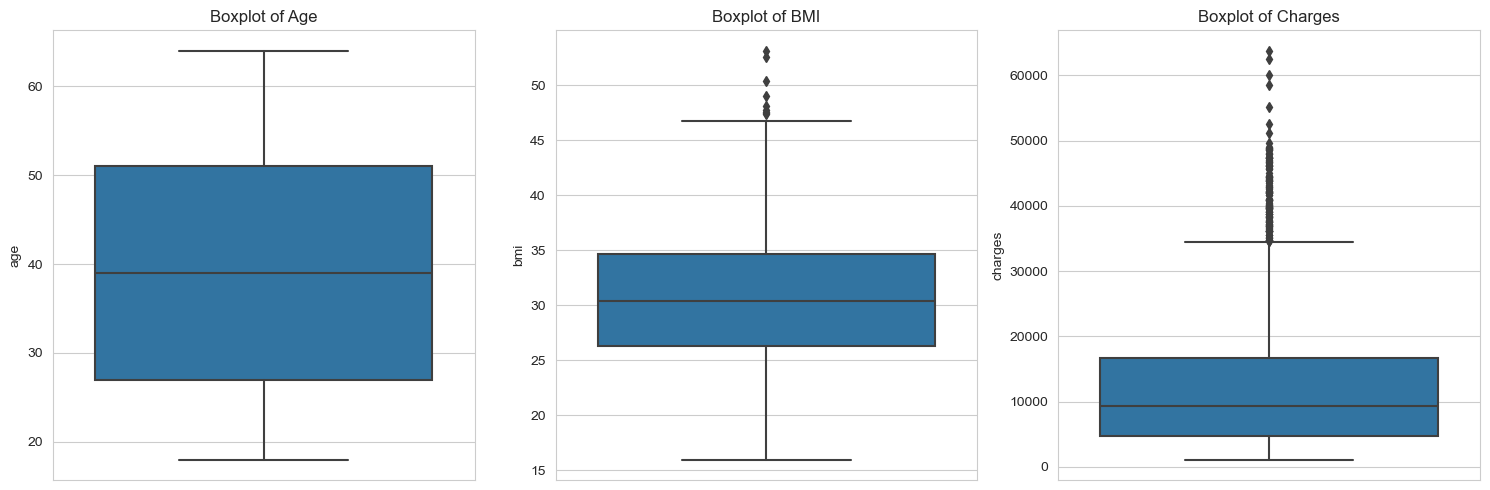

In [44]:
# 3. Identify potential outliers or influential points
# Boxplots for 'age', 'bmi', 'charges' to identify outliers
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['age'])
plt.title('Boxplot of Age')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['bmi'])
plt.title('Boxplot of BMI')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['charges'])
plt.title('Boxplot of Charges')

plt.tight_layout()
plt.show()

In [7]:
df['sex'] = df['sex'].apply({'male':1,'female':0}.get)
df['smoker'] = df['smoker'].apply({'yes':1,'no':0}.get)
df['region'] = df['region'].apply({'southwest':1,'southeast':2,'northwest':3,'northeast':4}.get)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


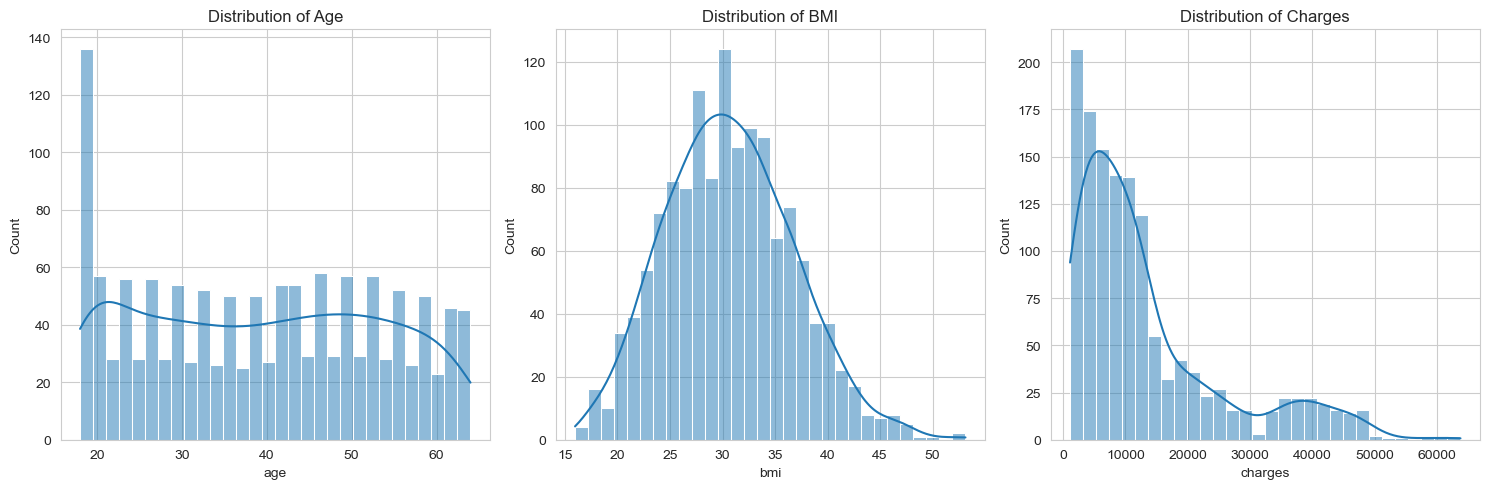

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Exploratory Data Analysis (EDA)

# 1. Analyze the distribution of key variables: 'age', 'bmi', 'charges'
plt.figure(figsize=(15, 5))

# Distribution of 'age'
plt.subplot(1, 3, 1)
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')

# Distribution of 'bmi'
plt.subplot(1, 3, 2)
sns.histplot(df['bmi'], bins=30, kde=True)
plt.title('Distribution of BMI')

# Distribution of 'charges'
plt.subplot(1, 3, 3)
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Distribution of Charges')

plt.tight_layout()
plt.show()

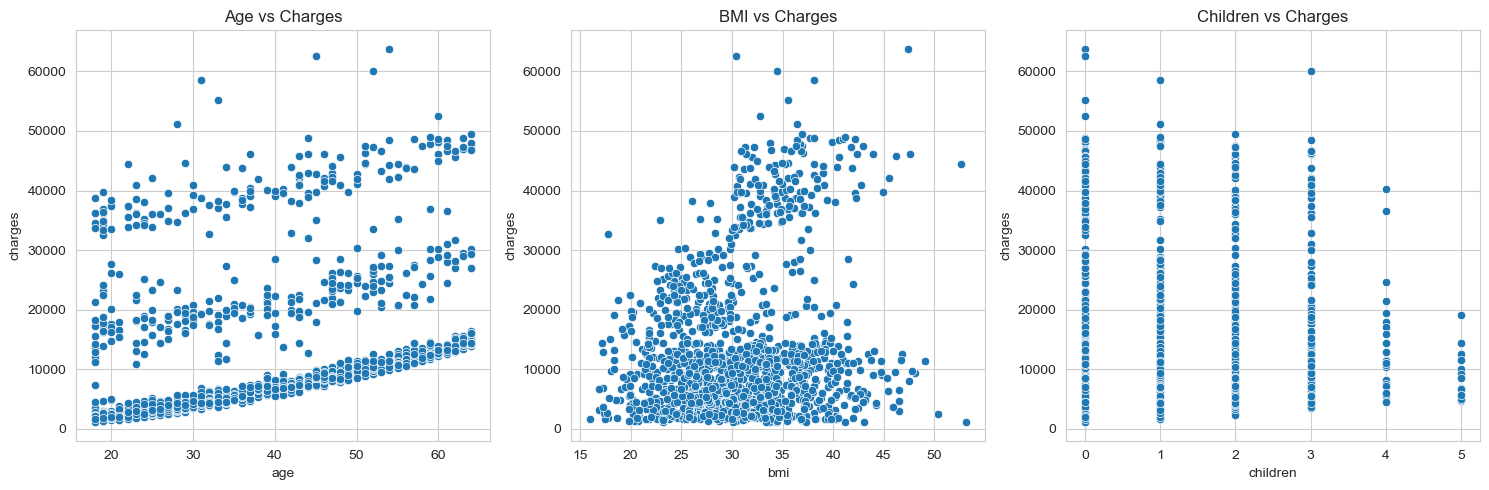

In [11]:
# 2. Investigate relationships between features and the target variable ('charges')
plt.figure(figsize=(15, 5))

# Relationship between 'age' and 'charges'
plt.subplot(1, 3, 1)
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs Charges')

# Relationship between 'bmi' and 'charges'
plt.subplot(1, 3, 2)
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs Charges')

# Relationship between 'children' and 'charges'
plt.subplot(1, 3, 3)
sns.scatterplot(x='children', y='charges', data=df)
plt.title('Children vs Charges')

plt.tight_layout()
plt.show()

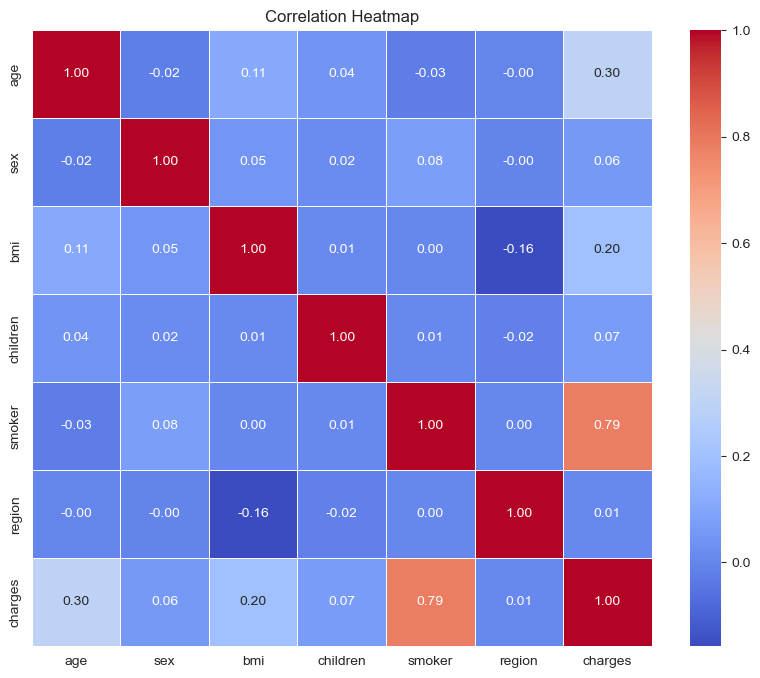

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data_encoded' is your DataFrame
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [39]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame
# Replace 'charges' with the actual name of your target variable
target_column = 'charges'

# Selecting independent variables
features = ['smoker', 'region', 'age']

# Adding the selected features to the input 'x'
x = df[features]

# Adding the remaining features to 'x' (excluding 'sex')
x = pd.concat([x, df.drop([target_column, 'sex'], axis=1)], axis=1)

# Assigning the target variable 'charges' to 'y'
y = df[target_column]

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Displaying the shapes of the datasets
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (935, 8)
x_test shape: (402, 8)
y_train shape: (935,)
y_test shape: (402,)


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assuming 'x_train', 'x_test', 'y_train', 'y_test' are already defined
# If not, replace them with your actual training and testing sets

# Create and fit the linear regression model
linreg = LinearRegression()
linreg.fit(x_train, y_train)

# Get the coefficients and intercept
coefficients = linreg.coef_
intercept = linreg.intercept_

# Display the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Make predictions on the test set
pred = linreg.predict(x_test)

# Evaluate the model
r2 = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)

# Additional information: RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Coefficients: [11423.28912716   134.46418057   126.03265953   126.03265953
   321.74203627   524.52112621 11423.28912716   134.46418057]
Intercept: -12622.82498131496
R2 Score: 0.7724051702155714
Mean Squared Error: 38945505.654892005
Root Mean Squared Error: 6240.63343378635


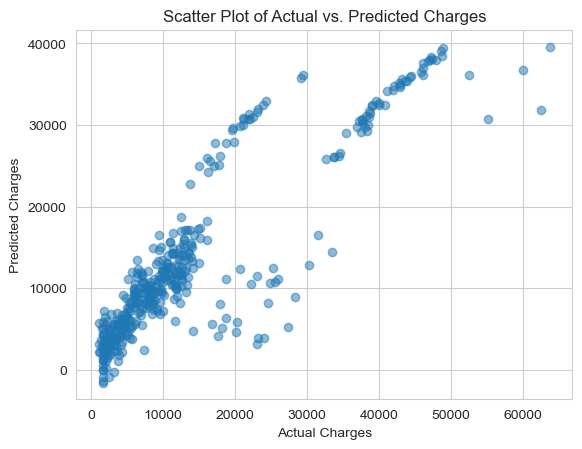

In [42]:
import matplotlib.pyplot as plt

# Assuming 'y_test' and 'pred' are your actual and predicted values
# If not, replace them with your actual data

# Scatter plot
plt.scatter(y_test, pred, alpha=0.5)
plt.title('Scatter Plot of Actual vs. Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

In [24]:
data = {'age':50, 'bmi':25, 'children':2, 'smoker':0, 'region':2}
index = [0]
cust_df = pd.DataFrame(data,index)
cust_df

,age,bmi,children,smoker,region
0,50,25,2,0,2


In [28]:
cost_pred = linreg.predict(cust_df)
print(cost_pred)

[9610.89085311]
